# Thomas Pinto Franco

Project 1: Radiative Transfer in a Planetary Atmosphere

10/23/19


Below: First example of code, set on Earth. 1000 photons used to have enough atmospheric runs to show data, but not so many that it takes long periods of time to run experiments.

In [1]:
#Project 1: Radiative Transfer in a Planetary Atmosphere
import matplotlib.pyplot as pl
import numpy as np
from numpy.random import RandomState


photons = int(input('How many Photons? '))

L = int(input('How many Layers? ')) #Total amount of layers in the atmosphere

layerAbsorb = np.zeros(L) #Array that stores how many photons are absorbed into each atmospheric layer

t = (float(input('Optical Depth? '))) #Optical depth for Earth ~ 1.1

dt = t/L #The fraction of the optical depth per layer

#Variables that keep track of how many photons escape the atmosphere and how many get absorbed by the ground
finalCountEscape = 0
finalCountSurface = 0

#A loop for every photon 
for i in range(photons):
    r = RandomState()
    N = 0  #Current layer value
    n = 1  #we use little n to easily change how N is incremented
    
    while (N < L): #While the current layer is less than the total amount of atmospheric layers...
        value = r.rand()
        upDownVal = r.rand()
        N += n #increment the current layer depending on whether the photon is absorbed or not. 
               #At the beginning of each loop, photon starts moving upward from the ground.
        
        if (value <= dt): #Is the photon absorbed, or does it pass through?
            layerAbsorb[N-1] += 1
        
            if (upDownVal <= 0.5): #50% chance to be emitted up or down
                n = 1
            else:
                n = -1
                
        if (N >= L):
            finalCountEscape += 1
        elif (N < 0):
            n = 0
            finalCountSurface += 1
            break #If a photon is absorbed into the ground, end the while loop. 

print('For',photons,'photons:')
print('Total Photons Escaped:',finalCountEscape)
print('Total Photons Absorbed into Surface:',finalCountSurface)

A = 0.33 #Bond albedo for Earth

tEff = (((1-A)*1367.7)/(4*0.0000000567))**(1/4) #Effective temperature; equilibrium temperature of the planet. 252 K for Earth, 240 K for Venus

tau = np.linspace(0,t,L) #Array of optical depths throughout the atmosphere
tauFlip = tau[::-1] #In order to flip the tau data for the graph to match the flipping of the y-axis

#Equations: First is for measuring ground temperature, second is for the temperature of each individual layer
Tg = ((tEff**4)*(1+(finalCountSurface/finalCountEscape)))**(1/4)

layerTemps = ((1/(2*dt))*(layerAbsorb/finalCountEscape)*(tEff**4))**(1/4)

strat = layerTemps[int(L/2)]

print('Ground Temp:',Tg,'K')
print('Final Layer Heat:',layerTemps[-1],'K')
print('Stratosphere Heat (Halfway):',strat,'K')
print('Effective Temperature:',tEff,'K')

print('Amount of photons absorbed by each respective layer:')
print(layerAbsorb)

#Graph plotting optical depth throughout the atmosphere vs the temperature of each layer
pl.title('Tau vs. Temp')
pl.xlabel('Atmospheric Temperature per layer')
pl.ylabel('Optical Depth')
pl.plot(layerTemps,tauFlip,'m')
pl.gca().invert_yaxis() #Inverting the y-axis, as an optical depth of 0 corresponds to the top of the atmosphere
pl.grid()

#print('Temperature of each respective layer, in Kelvin:')
#print(layerTemps)

How many Photons? 1000000
How many Layers? 135
Optical Depth? 1.1
For 1000000 photons:
Total Photons Escaped: 647143
Total Photons Absorbed into Surface: 352857
Ground Temp: 281.0965953053099 K
Final Layer Heat: 237.7096055215724 K
Stratosphere Heat (Halfway): 235.33539648352433 K
Effective Temperature: 252.1190429419147 K
Amount of photons absorbed by each respective layer:
[11318. 10835. 10979. 10893. 10948. 10833. 10886. 10697. 10791. 10653.
 10582. 10414. 10639. 10595. 10318. 10522. 10289. 10161. 10416. 10223.
 10145. 10172. 10185. 10069. 10008.  9906.  9975.  9807.  9803.  9670.
  9678.  9671.  9568.  9632.  9709.  9552.  9568.  9340.  9197.  9448.
  9455.  8918.  9274.  9094.  9082.  9080.  9132.  9123.  8892.  8733.
  8758.  8859.  8719.  8844.  8862.  8587.  8648.  8602.  8564.  8469.
  8378.  8238.  8258.  8419.  8189.  8271.  8061.  8006.  8102.  8070.
  8065.  7986.  7756.  7942.  8000.  7770.  7702.  7690.  7485.  7694.
  7518.  7695.  7467.  7456.  7432.  7287.  7138.  725

For the Earth calculations:


1. We can say that the stratosphere is around halfway up from the Earth throughout the atmosphere, so we can say that around the temperature of around halfway through our layerTemps array represents the temperature of our stratosphere. 


    Data:

    Run 1; (Strat,Top) in Kelvin
            (272,239) Makes sense
            (240,270)
            (243,243)
            (181,215)
            (290,257) Makes sense
            (230,153) Makes sense
            (218,241)
            (240,250)
            (181,248)
            (242,251)
            (252,268)
            (242,203) Makes sense
  Data is showing that the stratosphere is usually (8/12, so ~67% of the time) colder than the top layer which does not make sense. Parts of the atmosphere closer to the Earth's surface should be warmer on average. We can chalk this up to the fact that we are assuming in this simulation that every layer in the atmosphere is exactly the same, with each one having the same percent chance to absorb a particle, whether you're near the top or bottom layer. However, I can also see myself being unlucky; I did only do 12 runs, and this does not give a good indicator of truly how often the difference between the strat temp and top temp doesn't make sense. The fact this happens at all, however, exposes a problem within my code.
  
  
  
2. Currently, at 1000 photons, 135 layers, an effective temperature of 253, and an optical depth of 1.1, we average around (279, 279, 280, 279, 284, 279, 282, 282, 281, 281), an average of 280.6 K. 

    At 1.2, (284,283,286,283,281,284,288,281,282,285), an average of 283.7 K. 

    Thats a difference of almost exactly three degrees! We only want one, so an increase of even just 0.1 is too high. Lets try an increase of 0.05; our optical depth will now be 1.15.

    Here, we get (286,283,283,282,285,282,281,285,285,282), an average of 283.4 K. Hunh. 

    Lets try 1.11. (286,279,284,281,281,281,281,282,282,282) which has an average of 281.9 K. 

    Much much closer! That's an increase of 1.3 degrees from our initial average. It can be argued that due to the random nature of this simulation, and said simulation not being completely accurate, we can say an increase in optical depth of 0.005-0.01 increases the overall ground temperature by about 1 degree.


3. With our current values, and an bond albedo of 0.33, we can just use the same initial average as in (2): 280.6 K. Changing the bond albedo by 0.1 changes our effective temperature by 10 degrees, so already we want the difference to be significantly under 0.1. 

    Lets try 0.30. (286,283,283,284,284,285,283,285,286,283) which is an average of 284.2. 3 degrees too high! Lets go a little higher, to 0.32. (281,284,283,280,285,283,281,281,284,283). That has an average of 282.5 K, so we are getting closer. 
    
    Lets try a bond albedo of 0.325. (284,281,282,279,280,280,281,281,281,279). From that, an average of 280.8 K. We increased the bond albedo too much! 
    
    Let's try 0.3215. (282,282,282,281,280,282,281,281,282,282) which has an average of 281.5 K. Compared to our initial 280.6 K, we are right on the money! On average, decreasing your bond albedo by about 0.0085 should result in around a 1 degree increase of your surface temperature.

Next block is set on Venus.

How many Photons? 1000
How many Layers? 10560
Optical Depth? 100
For 1000 photons:
Total Photons Escaped: 18
Total Photons Absorbed into Surface: 982
Ground Temp: 655.229007050176 K
Final Layer Heat: 544.016689645129 K
Amount of photons absorbed by each respective layer:
[15. 22. 19. ...  0.  9.  9.]
Temperature of each respective layer, in Kelvin:
[618.12229846 680.23232545 655.75256241 ...   0.         544.01668965
 544.01668965]


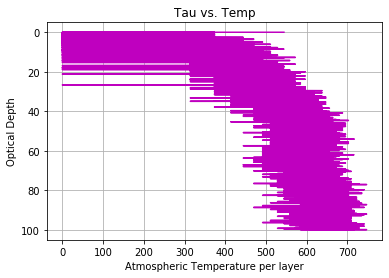

In [3]:
#Project 1: Radiative Transfer in a Planetary Atmosphere
import matplotlib.pyplot as pl
import numpy as np
from numpy.random import RandomState


photons = int(input('How many Photons? '))

L = int(input('How many Layers? ')) #Total amount of layers in the atmosphere; Venus is gonna have way, 
                                                                                #way more layers than Earth

layerAbsorb = np.zeros(L) #Array that stores how many photons are absorbed into each atmospheric layer

t = (float(input('Optical Depth? '))) #We gotta figure out what the optical depth for Venus would be;
                                                                    #Is going to be much larger than Earth's optical depth

dt = t/L #The fraction of the optical depth per layer

#Variables that keep track of how many photons escape the atmosphere and how many get absorbed by the ground
finalCountEscape = 0
finalCountSurface = 0

#A loop for every photon 
for i in range(photons):
    r = RandomState()
    N = 0  #Current layer value
    n = 1  #we use little n to easily change how N is incremented
    
    while (N < L): #While the current layer is less than the total amount of atmospheric layers...
        value = r.rand()
        upDownVal = r.rand()
        N += n #increment the current layer depending on whether the photon is absorbed or not. 
               #Photon starts moving upward from the ground.
        
        if (value <= dt): #Is the photon absorbed, or does it pass through?
            layerAbsorb[N-1] += 1
        
            if (upDownVal <= 0.5): #50% chance to be emitted up or down
                n = 1
            else:
                n = -1
                
        if (N >= L):
            finalCountEscape += 1
        elif (N < 0):
            n = 0
            finalCountSurface += 1
            break #If a photon is absorbed into the ground, end the while loop. 

print('For',photons,'photons:')
print('Total Photons Escaped:',finalCountEscape)
print('Total Photons Absorbed into Surface:',finalCountSurface)

tEff = 240 #Effective temperature; equilibrium temperature of the planet. 252 K for Earth, 240 K for Venus

tau = np.linspace(0,t,L) #Array of optical depths throughout the atmosphere
tauFlip = tau[::-1] #In order to flip the tau data for the graph to match the flipping of the y-axis

#Equations: First is for measuring ground temperature, second is for the temperature of each individual layer
Tg = ((tEff**4)*(1+(finalCountSurface/finalCountEscape)))**(1/4)

layerTemps = ((1/(2*dt))*(layerAbsorb/finalCountEscape)*(tEff**4))**(1/4)


print('Ground Temp:',Tg,'K')
print('Final Layer Heat:',layerTemps[-1],'K')

print('Amount of photons absorbed by each respective layer:')
print(layerAbsorb)

#Graph plotting optical depth throughout the atmosphere vs the temperature of each layer
pl.title('Tau vs. Temp')
pl.xlabel('Atmospheric Temperature per layer')
pl.ylabel('Optical Depth')
pl.plot(layerTemps,tauFlip,'m')
pl.gca().invert_yaxis() #Inverting the y-axis, as an optical depth of 0 corresponds to the top of the atmosphere
pl.grid()

print('Temperature of each respective layer, in Kelvin:')
print(layerTemps)

Initially, we know that Venus' effective temperature is very similar to Earth's, at around 240 K, but it's surface temperature is much higher at around 700 K compared to our piddly 280 K. We also know that Venus' atmosphere is much, much thicker and denser compared to Earth's. The pressure on Venus' surface is so high that carbon dioxide isn't a gas but rather a supercritical fluid; according to our table, the pressure at the ground level of venus is 80 times more than that of Earth's, so I took my original 135 layers from the last code block and multiplied by 80, resulting in a whopping 10560 layers. 
    
   I then experimented with the optical depth, keeping the amount of photons at 1000. To make any serious impact on the surface temperature (increasing by hundreds of Kelvin), you need to alter the optical depth by 10's. But even at an optical depth of 30, we only have a surface temperature of ~477 K! Doubling that to 60 didn't do much more, only putting us at a surface temperature of ~547 K. The more you increase optical depth, the less of an impact it has on increasing the temperature, if you keep the total amount of layers fixed. Through more experimentation, I found I was reaching temperatures of 600-700 K at an optical depth of around 100, and going further above 100 brought about the potential for the ground temperature to be notably higher than 700 K. Experimenting with higher amounts of photons (2000) seemed to enforce this. I imagine the reasoning behind there being so much error is due to the nature of our simulation, with every layer in the atmosphere having exactly the same optical depth.